In [1036]:
import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1037]:
df1= pd.read_csv('E:\covid india\covid_19_india.csv')

In [1038]:
df1.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [1039]:
df1.describe()

,Sno,Cured,Deaths,Confirmed
count,9291.000000,9.291000e+03,9291.000000,9.291000e+03
mean,4646.000000,7.863266e+04,1487.620385,9.183978e+04
std,2682.225009,1.931102e+05,4713.813690,2.166014e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,2323.500000,1.520000e+02,2.000000,5.385000e+02
50%,4646.000000,4.308000e+03,66.000000,6.832000e+03
75%,6968.500000,5.772650e+04,926.500000,7.885600e+04
max,9291.000000,1.737080e+06,47827.000000,1.859367e+06


In [1040]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9291 entries, 0 to 9290
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       9291 non-null   int64 
 1   Date                      9291 non-null   object
 2   Time                      9291 non-null   object
 3   State/UnionTerritory      9291 non-null   object
 4   ConfirmedIndianNational   9291 non-null   object
 5   ConfirmedForeignNational  9291 non-null   object
 6   Cured                     9291 non-null   int64 
 7   Deaths                    9291 non-null   int64 
 8   Confirmed                 9291 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 653.4+ KB


In [1041]:
df1.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

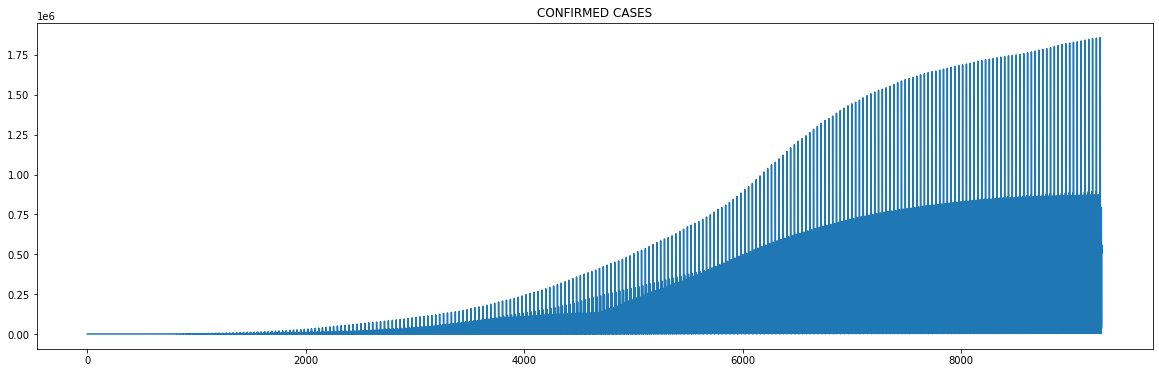

In [1042]:
plt.figure(figsize=(20,6))
plt.plot(df1['Confirmed'])
plt.title('CONFIRMED CASES')
plt.show()

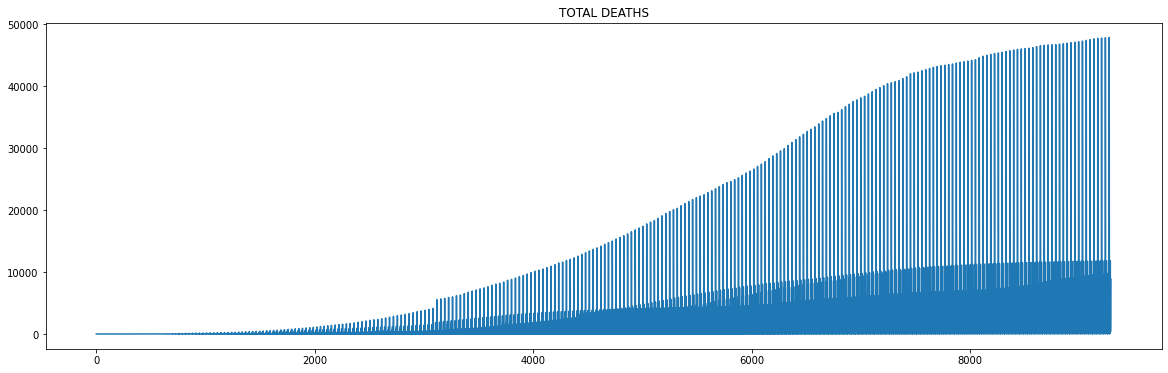

In [1043]:
plt.figure(figsize=(20,6))
plt.plot(df1['Deaths'])
plt.title('TOTAL DEATHS')
plt.show()

In [1044]:
df1['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [1045]:
df1=df1.replace('Telengana','Telangana')
df1=df1.replace('Telengana***','Telangana')
df1=df1.replace('Telangana***','Telangana')
df1=df1.replace('Maharashtra***','Maharashtra')
df1=df1.replace('Chandigarh***','Chandigarh')
df1=df1.replace('Punjab***','Punjab')


In [1046]:
df1['State/UnionTerritory'].unique()

array(['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu'], dtype=object)

In [1047]:
x=df1['Confirmed'].sum()
y=df1['Deaths'].sum()
z=df1['Cured'].sum()
active=x-y-z
print('TOTAL CONFIRMED CASES=',x)
print('TOTAL DEATHS=',y)
print('CURED CASES',z)
print('ACTIVE CASES=',active)

TOTAL CONFIRMED CASES= 853283429
TOTAL DEATHS= 13821481
CURED CASES 730576046
ACTIVE CASES= 108885902


<AxesSubplot:>

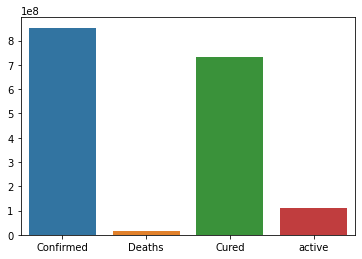

In [1048]:
sns.barplot(x=['Confirmed','Deaths','Cured','active'],y=[x,y,z,active])

In [1049]:
df1 = df1.tail(35)
df1 = df1.sort_values(by='Confirmed', ascending=False).head(10)

<BarContainer object of 10 artists>

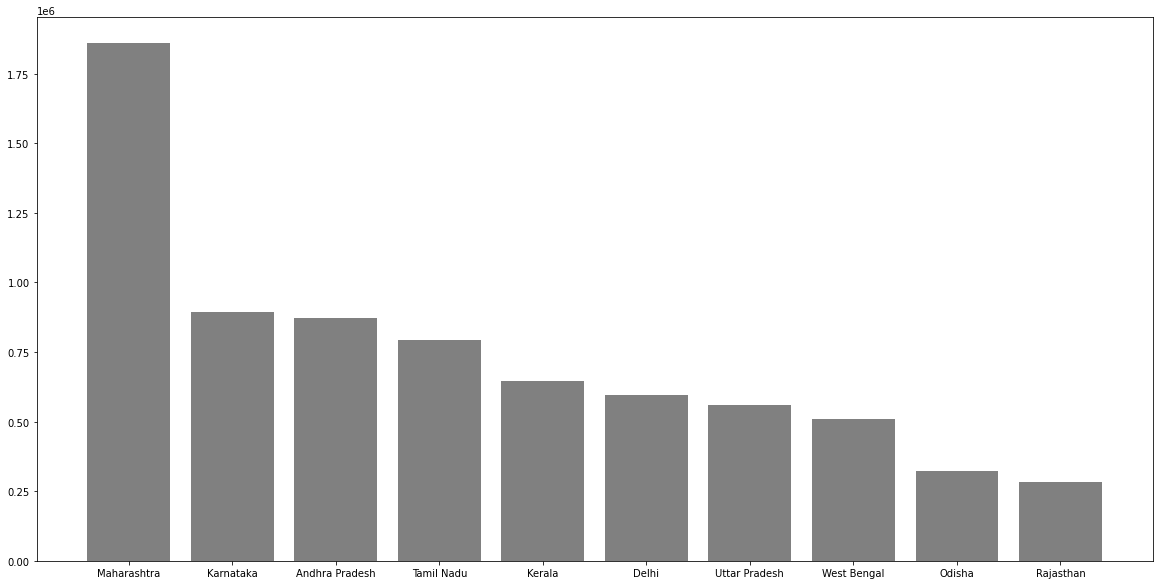

In [1050]:
plt.figure(figsize=(20,10))
plt.bar(df1['State/UnionTerritory'],height=df1['Confirmed'],color='grey')

In [1051]:
df1['Fatal_Ratio']=df1['Deaths']/df2['Confirmed']

In [1052]:
df1

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Fatal_Ratio
9275,9276,09/12/20,8:00 AM,Maharashtra,-,-,1737080,47827,1859367,0.025722
9271,9272,09/12/20,8:00 AM,Karnataka,-,-,858370,11880,895284,0.013270
9257,9258,09/12/20,8:00 AM,Andhra Pradesh,-,-,860368,7042,872839,0.008068
9285,9286,09/12/20,8:00 AM,Tamil Nadu,-,-,770378,11822,792788,0.014912
9272,9273,09/12/20,8:00 AM,Kerala,-,-,582351,2472,644696,0.003834
9264,9265,09/12/20,8:00 AM,Delhi,-,-,565039,9763,597112,0.016350
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173,0.014273
9290,9291,09/12/20,8:00 AM,West Bengal,-,-,475425,8820,507995,0.017362
9280,9281,09/12/20,8:00 AM,Odisha,-,-,316970,1784,321913,0.005542
9283,9284,09/12/20,8:00 AM,Rajasthan,-,-,260773,2468,284116,0.008687


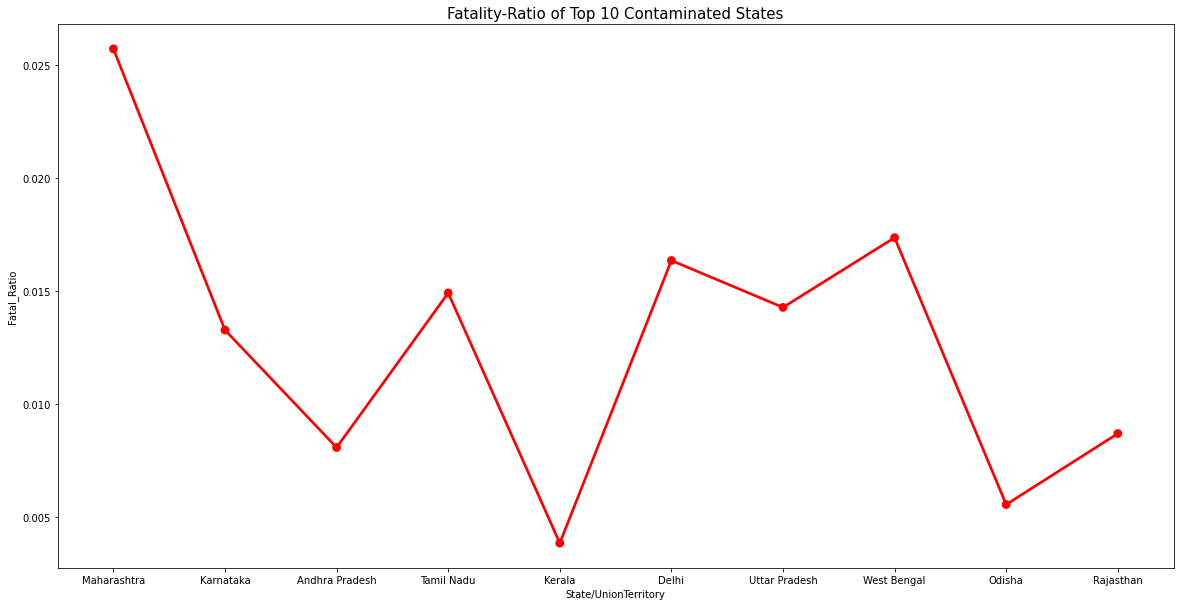

In [1053]:
plt.figure(figsize=(20,10))
plt.title('Fatality-Ratio of Top 10 Contaminated States',size=15)
sns.pointplot(data=df1,x='State/UnionTerritory',y='Fatal_Ratio',color='Red')
plt.show()

In [1054]:
df1['Cured_Ratio']=df1['Cured']/df2['Confirmed']

In [1055]:
df1

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Fatal_Ratio,Cured_Ratio
9275,9276,09/12/20,8:00 AM,Maharashtra,-,-,1737080,47827,1859367,0.025722,0.934232
9271,9272,09/12/20,8:00 AM,Karnataka,-,-,858370,11880,895284,0.013270,0.958768
9257,9258,09/12/20,8:00 AM,Andhra Pradesh,-,-,860368,7042,872839,0.008068,0.985712
9285,9286,09/12/20,8:00 AM,Tamil Nadu,-,-,770378,11822,792788,0.014912,0.971733
9272,9273,09/12/20,8:00 AM,Kerala,-,-,582351,2472,644696,0.003834,0.903296
9264,9265,09/12/20,8:00 AM,Delhi,-,-,565039,9763,597112,0.016350,0.946286
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173,0.014273,0.947434
9290,9291,09/12/20,8:00 AM,West Bengal,-,-,475425,8820,507995,0.017362,0.935885
9280,9281,09/12/20,8:00 AM,Odisha,-,-,316970,1784,321913,0.005542,0.984645
9283,9284,09/12/20,8:00 AM,Rajasthan,-,-,260773,2468,284116,0.008687,0.917840


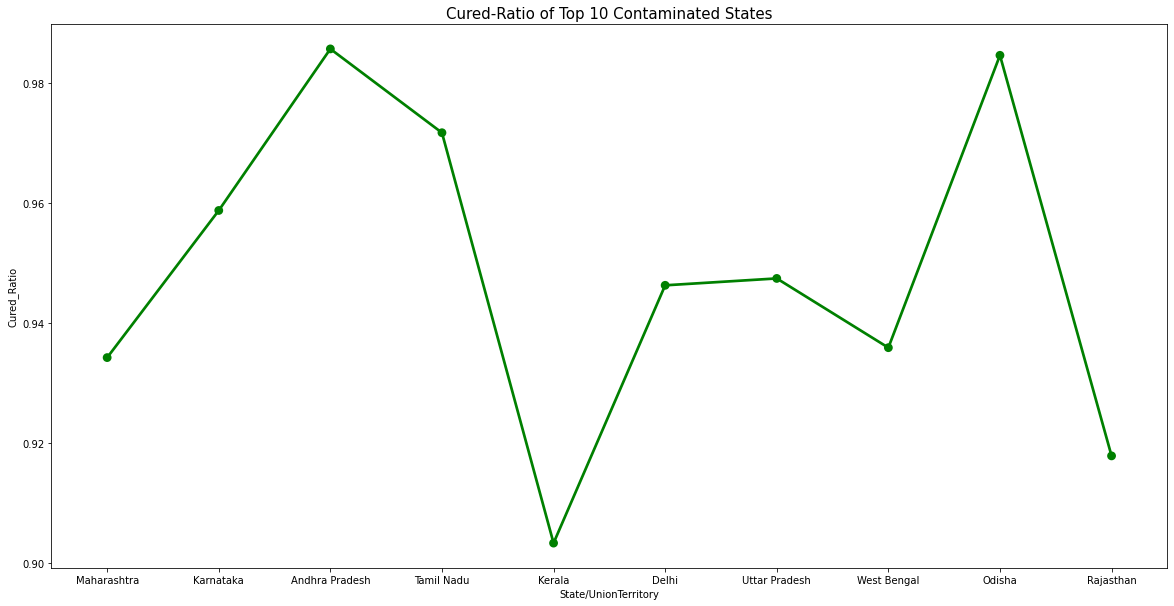

In [1056]:
plt.figure(figsize=(20,10))
plt.title('Cured-Ratio of Top 10 Contaminated States',size=15)
sns.pointplot(data=df1,x='State/UnionTerritory',y='Cured_Ratio',color='Green')
plt.show()